In [1]:
import astropy.units as u
import numpy as np
import os

os.environ["PIXEDFIT_HOME"] = "/nvme/scratch/work/tharvey/piXedfit/"
from EXPANSE import ResolvedGalaxy, ResolvedGalaxies
from matplotlib import pyplot as plt
import glob
from scipy import signal
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic
# Change dpi to make plots larger

plt.rcParams["figure.dpi"] = 100

# Disable tex in matplotlib

plt.rcParams["text.usetex"] = False

# %matplotlib inline

Running on Morgan.


In [2]:
galaxies = ResolvedGalaxies(
    ResolvedGalaxy.init_all_field_from_h5("JOF_psfmatched", n_jobs = 6)
)

Found 133 galaxies in field JOF_psfmatched


Loading galaxies in parallel:   5%|▍         | 6/133 [00:00<00:02, 53.88it/s]

Running on Morgan.
Running on Morgan.
Running on Morgan.
Running on Morgan.
Running on Morgan.
Running on Morgan.


Loading galaxies in parallel: 100%|██████████| 133/133 [00:22<00:00,  5.80it/s]


In [3]:
table = galaxies.save_to_fits(overwrite=True)

table

Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10045
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10069
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10092
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10145
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10376
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10452
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10536
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 1076
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10896
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 10908
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 11076
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 11149
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 11388
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 11426
Could not find TOTAL_BIN in CNST_SFH_RESOLVED_P table for 11482
Could not find TOTAL_BIN in CNST_SFH_RESO

galaxy_id,survey,galfind_version,redshift,cutout_size,CNST_SFH_RESOLVED_P_resolved_mass,CNST_SFH_RESOLVED_P_resolved_sfr_100myr,photoz_continuity_resolved_mass,photoz_continuity_resolved_sfr_100myr,photoz_continuity_#ID,photoz_continuity_continuity:dsfr1_16,photoz_continuity_continuity:dsfr1_50,photoz_continuity_continuity:dsfr1_84,photoz_continuity_continuity:dsfr2_16,photoz_continuity_continuity:dsfr2_50,photoz_continuity_continuity:dsfr2_84,photoz_continuity_continuity:dsfr3_16,photoz_continuity_continuity:dsfr3_50,photoz_continuity_continuity:dsfr3_84,photoz_continuity_continuity:dsfr4_16,photoz_continuity_continuity:dsfr4_50,photoz_continuity_continuity:dsfr4_84,photoz_continuity_continuity:dsfr5_16,photoz_continuity_continuity:dsfr5_50,photoz_continuity_continuity:dsfr5_84,photoz_continuity_continuity:massformed_16,photoz_continuity_continuity:massformed_50,photoz_continuity_continuity:massformed_84,photoz_continuity_continuity:metallicity_16,photoz_continuity_continuity:metallicity_50,photoz_continuity_continuity:metallicity_84,photoz_continuity_dust:Av_16,photoz_continuity_dust:Av_50,photoz_continuity_dust:Av_84,photoz_continuity_nebular:logU_16,photoz_continuity_nebular:logU_50,photoz_continuity_nebular:logU_84,photoz_continuity_redshift_16,photoz_continuity_redshift_50,photoz_continuity_redshift_84,photoz_continuity_stellar_mass_16,photoz_continuity_stellar_mass_50,photoz_continuity_stellar_mass_84,photoz_continuity_formed_mass_16,photoz_continuity_formed_mass_50,photoz_continuity_formed_mass_84,photoz_continuity_sfr_16,photoz_continuity_sfr_50,photoz_continuity_sfr_84,photoz_continuity_ssfr_16,photoz_continuity_ssfr_50,photoz_continuity_ssfr_84,photoz_continuity_nsfr_16,photoz_continuity_nsfr_50,photoz_continuity_nsfr_84,photoz_continuity_mass_weighted_age_16,photoz_continuity_mass_weighted_age_50,photoz_continuity_mass_weighted_age_84,photoz_continuity_tform_16,photoz_continuity_tform_50,photoz_continuity_tform_84,photoz_continuity_tquench_16,photoz_continuity_tquench_50,photoz_continuity_tquench_84,photoz_continuity_sfr_10myr_16,photoz_continuity_sfr_10myr_50,photoz_continuity_sfr_10myr_84,photoz_continuity_ssfr_10myr_16,photoz_continuity_ssfr_10myr_50,photoz_continuity_ssfr_10myr_84,photoz_continuity_nsfr_10myr_16,photoz_continuity_nsfr_10myr_50,photoz_continuity_nsfr_10myr_84,photoz_continuity_UV_colour_16,photoz_continuity_UV_colour_50,photoz_continuity_UV_colour_84,photoz_continuity_VJ_colour_16,photoz_continuity_VJ_colour_50,photoz_continuity_VJ_colour_84,photoz_continuity_beta_C94_16,photoz_continuity_beta_C94_50,photoz_continuity_beta_C94_84,photoz_continuity_m_UV_16,photoz_continuity_m_UV_50,photoz_continuity_m_UV_84,photoz_continuity_M_UV_16,photoz_continuity_M_UV_50,photoz_continuity_M_UV_84,photoz_continuity_Halpha_EWrest_16,photoz_continuity_Halpha_EWrest_50,photoz_continuity_Halpha_EWrest_84,photoz_continuity_xi_ion_caseB_16,photoz_continuity_xi_ion_caseB_50,photoz_continuity_xi_ion_caseB_84,photoz_continuity_Halpha_flux_16,photoz_continuity_Halpha_flux_50,photoz_continuity_Halpha_flux_84,photoz_continuity_HBeta_flux_16,photoz_continuity_HBeta_flux_50,photoz_continuity_HBeta_flux_84,photoz_continuity_OIII_5007_flux_16,photoz_continuity_OIII_5007_flux_50,photoz_continuity_OIII_5007_flux_84,photoz_continuity_OIII_4959_flux_16,photoz_continuity_OIII_4959_flux_50,photoz_continuity_OIII_4959_flux_84,photoz_continuity_input_redshift,photoz_continuity_log_evidence,photoz_continuity_log_evidence_err,photoz_continuity_chisq_phot,photoz_continuity_n_bands,photoz_delayed_resolved_mass,photoz_delayed_resolved_sfr_100myr,photoz_delayed_#ID,photoz_delayed_delayed:age_16,photoz_delayed_delayed:age_50,photoz_delayed_delayed:age_84,photoz_delayed_delayed:massformed_16,photoz_delayed_delayed:massformed_50,photoz_delayed_delayed:massformed_84,photoz_delayed_delayed:metallicity_16,photoz_delayed_delayed:metallicity_50,photoz_delayed_delayed:metallicity_84,photoz_delayed_delayed:tau_16,photoz_delayed_delayed:tau_50,photoz

## Resolved Mass vs. Integrated Mass

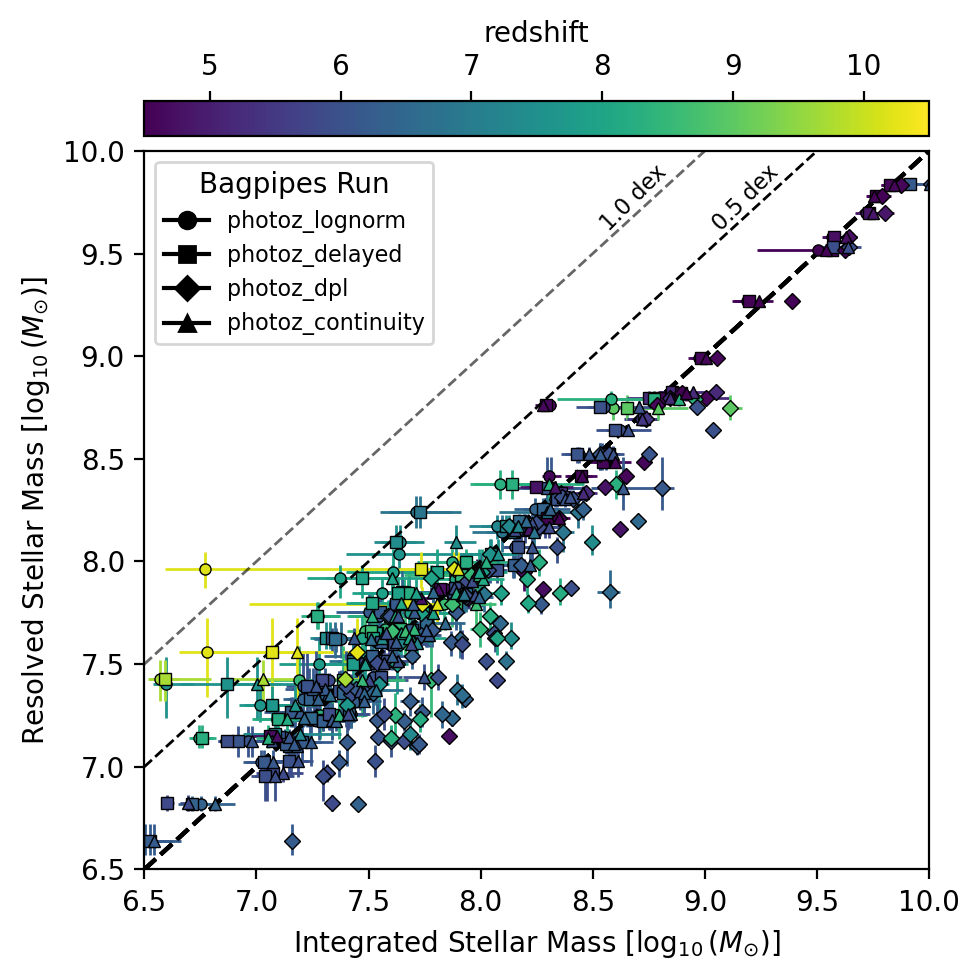

In [9]:
markers = ["o", "s", "D", "^", "v", "<", ">", "p", "P", "*", "X", "d", "H", "h", "+", "x", "|", "_", ".", ","]
bagpipes_runs = ["photoz_lognorm", "photoz_delayed", "photoz_dpl", "photoz_continuity"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 200, tight_layout = True, facecolor = 'white')
norm = plt.Normalize( vmin = 4.5, vmax = 10.5)

for marker, bagpipes_run in zip(markers, bagpipes_runs):
    galaxies.comparison_plot(bagpipes_run, "CNST_SFH_RESOLVED_P", label = False, markersize = 4, 
                            markeredgecolor = 'black', markeredgewidth = 0.5, elinewidth = 1, n_jobs = 1, 
                            color_by='redshift', ax = ax, marker = marker, fig = fig, add_colorbar = True if bagpipes_run == "photoz_lognorm" else False, norm = norm) 

# Plot 0.5 dex offset line
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.plot(xlim, np.array(ylim)+0.5, color='black', linestyle='--', linewidth=1)
# Label the line with angle text near the top of the line
ax.text(9.35, 9.95, r'0.5 dex', rotation=45, fontsize=8, color='black', ha = 'right', va = 'top')

ax.plot(xlim, np.array(ylim)+1.0, color = 'black', linestyle = '--', linewidth = 1, alpha = 0.6)
ax.text(8.85, 9.95, r'1.0 dex', rotation=45, fontsize=8, color='black', ha = 'right', va = 'top')

# Fake a legend with the markers
points = []
for marker, bagpipes_run in zip(markers, bagpipes_runs):
    point = ax.plot([], [], marker = marker, color = 'black', label = bagpipes_run)
    points.append(point[0])

ax.legend(handles = points, loc = 'upper left', fontsize = 8, title = 'Bagpipes Run')

ax.set_xlabel(r'Integrated Stellar Mass [$\log_{10}(M_{\odot})$]')
ax.set_ylabel(r'Resolved Stellar Mass [$\log_{10}(M_{\odot})$]')

fig.savefig('../plots/resolved_mass_comparison.pdf', dpi = 200, facecolor = 'white', bbox_inches = 'tight')

## Mass Discrepancy as a Function of sSFR

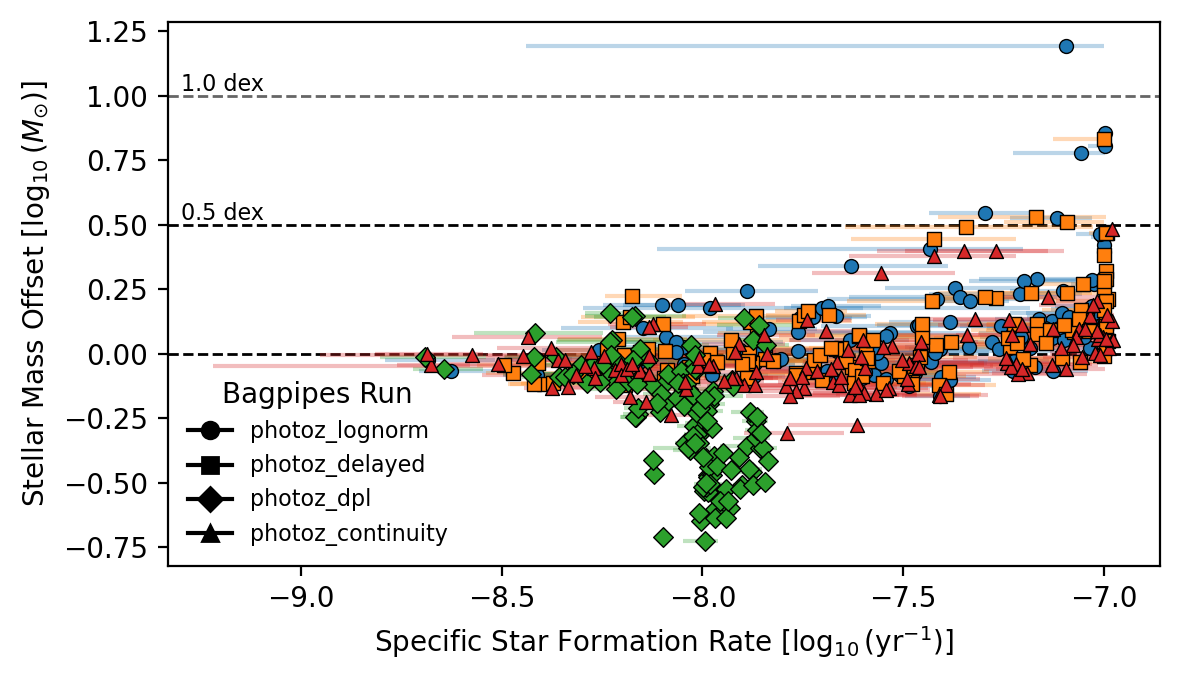

In [45]:
# use the table of results this time - loop over each SFH history again, plot sSFR vs delta mass. Propogate errors through the calculation.

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5), dpi = 200, tight_layout = True, facecolor = 'white')

for marker, bagpipes_run in zip(markers, bagpipes_runs):
    delta_mass = table['CNST_SFH_RESOLVED_P_resolved_mass'][:, 1] - table[f'{bagpipes_run}_stellar_mass_50']

    yerr = 0 #placeholder for now

    xerr_lower = table[f'{bagpipes_run}_ssfr_10myr_50'] - table[f'{bagpipes_run}_ssfr_10myr_16']
    xerr_upper = table[f'{bagpipes_run}_ssfr_10myr_84'] - table[f'{bagpipes_run}_ssfr_10myr_50']

    xerr = np.array([xerr_lower, xerr_upper])
    xerr[xerr < 0] = 0

    ax.errorbar(table[f'{bagpipes_run}_ssfr_10myr_50'], delta_mass, yerr = yerr, xerr=xerr, marker='none', linestyle='none', alpha = 0.3, zorder=5)
    ax.scatter(table[f'{bagpipes_run}_ssfr_10myr_50'], delta_mass, marker=marker, s=25, edgecolors='black', linewidth=0.5, zorder=10)

# Fix the x-axis limits
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# Make a dummy legend
points = []
for marker, bagpipes_run in zip(markers, bagpipes_runs):
    point = ax.plot([], [], marker = marker, color = 'black', label = bagpipes_run)
    points.append(point[0])

ax.legend(handles = points, loc = 'lower left', fontsize = 8, title = 'Bagpipes Run', frameon = False)


ax.set_xlabel(r'Specific Star Formation Rate [$\log_{10}(\mathrm{yr}^{-1})$]')
ax.set_ylabel(r'Stellar Mass Offset [$\log_{10}(M_{\odot})$]')
# Plot 1:1, 0.5 and 1 dex lines
xlim = ax.get_xlim()


ax.plot(xlim, [0, 0], color='black', linestyle='--', linewidth=1)

ax.plot(xlim, np.array([0, 0])+0.5, color='black', linestyle='--', linewidth=1)
ax.text(-9.3, 0.5, r'0.5 dex', rotation=0, fontsize=8, color='black', ha = 'left', va = 'bottom')

ax.plot(xlim, np.array([0, 0])+1.0, color = 'black', linestyle = '--', linewidth = 1, alpha = 0.6)
ax.text(-9.3, 1.0, r'1.0 dex', rotation=0, fontsize=8, color='black', ha = 'left', va = 'bottom')

fig.savefig('../plots/ssfr_vs_mass_offset.pdf', dpi = 200, facecolor = 'white', bbox_inches = 'tight')